<a href="https://colab.research.google.com/github/pandey-rakshit/AirBnb-Analysis/blob/main/Airbnb_NYC_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# AirBnb Analysis



## Project Description

### Business Context



Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.

### Dataset Description

data set - https://raw.githubusercontent.com/pandey-rakshit/AirBnb-Analysis/main/data/Airbnb%20NYC%202019.csv

|Field| Description|
|:--:|:--:|
|id| Unique ID|
|name | Name of the listing|
|host_id| unique host_id|
|host_name| Name of the Host|
|neighbourhood_group| location|
|neighborhood|area|
|latitude| Latitude range|
|longitude| Longitude range|
|room_type| type of listing|
|price| price of listing|
|minimum_nights| Minimum nights to be paid for|
|number_of reviews| number of reviews|
|last_review| Content of the last review|
|reeviews_per_month|Number of checks per month|
|calculated_host_listing_count|Total Count|
|availability_365| Availability around the year|



# Exploratory Data Analysis

## Prerequisite

In [1]:
# Library Installation

!pip install pandas numpy matplotlib seaborn wordcloud --quiet

In [2]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from wordcloud import WordCloud


## Data Ingestion

In [3]:
# Data Loading

dataset_url = "https://raw.githubusercontent.com/pandey-rakshit/AirBnb-Analysis/main/data/Airbnb%20NYC%202019.csv"

In [4]:
df = pd.read_csv(dataset_url)

In [5]:
df.shape

(48895, 16)

In [6]:
# Data Preview

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [8]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.isna().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


> Note:
>
> Missing Values found in following columns :- ***name, host_name, last_review, reviews_per_month***

In [10]:
filter_columns = set(df.columns) - {'id', 'name', 'host_name', 'host_id', 'latitude', 'longitude'}

In [11]:
filter_columns

{'availability_365',
 'calculated_host_listings_count',
 'last_review',
 'minimum_nights',
 'neighbourhood',
 'neighbourhood_group',
 'number_of_reviews',
 'price',
 'reviews_per_month',
 'room_type'}

In [12]:
filter_df = df[list(filter_columns)]

In [13]:
filter_df.describe().round(2)

,calculated_host_listings_count,minimum_nights,reviews_per_month,number_of_reviews,price,availability_365
count,48895.00,48895.00,38843.00,48895.00,48895.00,48895.00
mean,7.14,7.03,1.37,23.27,152.72,112.78
std,32.95,20.51,1.68,44.55,240.15,131.62
min,1.00,1.00,0.01,0.00,0.00,0.00
25%,1.00,1.00,0.19,1.00,69.00,0.00
50%,1.00,3.00,0.72,5.00,106.00,45.00
75%,2.00,5.00,2.02,24.00,175.00,227.00
max,327.00,1250.00,58.50,629.00,10000.00,365.00


In [14]:
corr_mat = filter_df.corr(numeric_only=True)

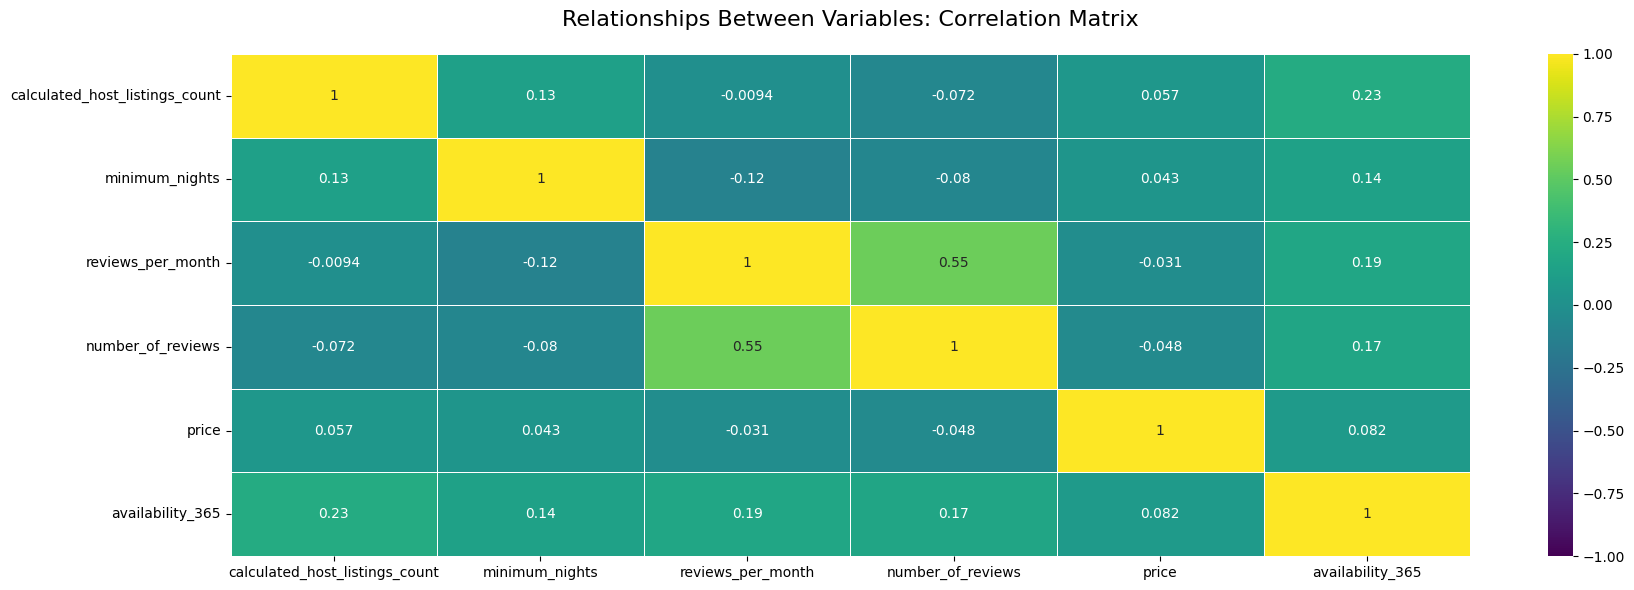

In [15]:
plt.figure(figsize=(18, 6))

sns.heatmap(corr_mat, cmap="viridis", annot=True, vmin = -1, linewidth=0.5)
# Customizing the heatmap
plt.title('Relationships Between Variables: Correlation Matrix', fontsize=16, pad=20)
# plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

> Note:
>
> ***number_of_reviews and reviews_per_month has high correlation***

- price has low co-relation with other columns

## Data Cleaning

### Missing Values

In [16]:
df.isna().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


#### handling missing values: host_name

In [17]:
def change_listing_host_name_if_null(row):
  if pd.isna(row['host_name']):
    host_id = row['host_id']
    row['host_name'] = f'Host_{host_id}'
  return row

In [18]:
df = df.apply(change_listing_host_name_if_null, axis=1)

#### handling missing values : name

In [19]:
def change_listing_name_if_null(row):
  if pd.isna(row['name']):
    row['name'] = row['host_name'] + ' Housing'
  return row

In [20]:
df = df.apply(change_listing_name_if_null, axis=1)

#### handling missing values: last review & reviews_per_month

In [21]:
missing_last_review_and_review_per_month_df = df[df['last_review'].isna().eq(True) & df['reviews_per_month'].isna().eq(True)]

In [22]:
missing_last_review_and_review_per_month_df.shape

(10052, 16)

> Note:
>
> missing values in `last_review = reviews_per_month = 10052`

- All missing values in last review and reviews_per_month are common rows and equal to total missing values i.e. ***10052***

- We can proceed with any of the two appraches:
  - Removing missing values
  - imputing the missing values

* Before moving ahead lets check if we can impute the values to prevent data loss.

In [23]:
missing_last_review_and_review_per_month_df['number_of_reviews'].eq(0).sum()

10052

> Note:
>
> As number of reviews are 0. we can conclude that there are no reviews added since ever
and this is the reason for missing values in last review and reviews per month.

Hence we `impute the value 0` to `reviews_per_month` and either `no reviews` in object type or leave the `last review column` as `null` to prevent data loss


In [24]:
# handling missing values in reviews_per_month

def handle_missing_values_in_reviews_per_month(row):
  if pd.isna(row['reviews_per_month']):
    row['reviews_per_month'] = 0
  return row

In [25]:
df = df.apply(handle_missing_values_in_reviews_per_month, axis=1)

In [26]:
df.isna().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [27]:
df['last_review'] = df['last_review'].apply(pd.to_datetime)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

### Handling Duplicate Values

In [29]:
# Duplicate values check

df.duplicated().sum()

0

> Note:
>
> No Duplicate values found in the dataset

### Outliers

In [30]:
numeric_columns = filter_df.describe().columns.tolist()

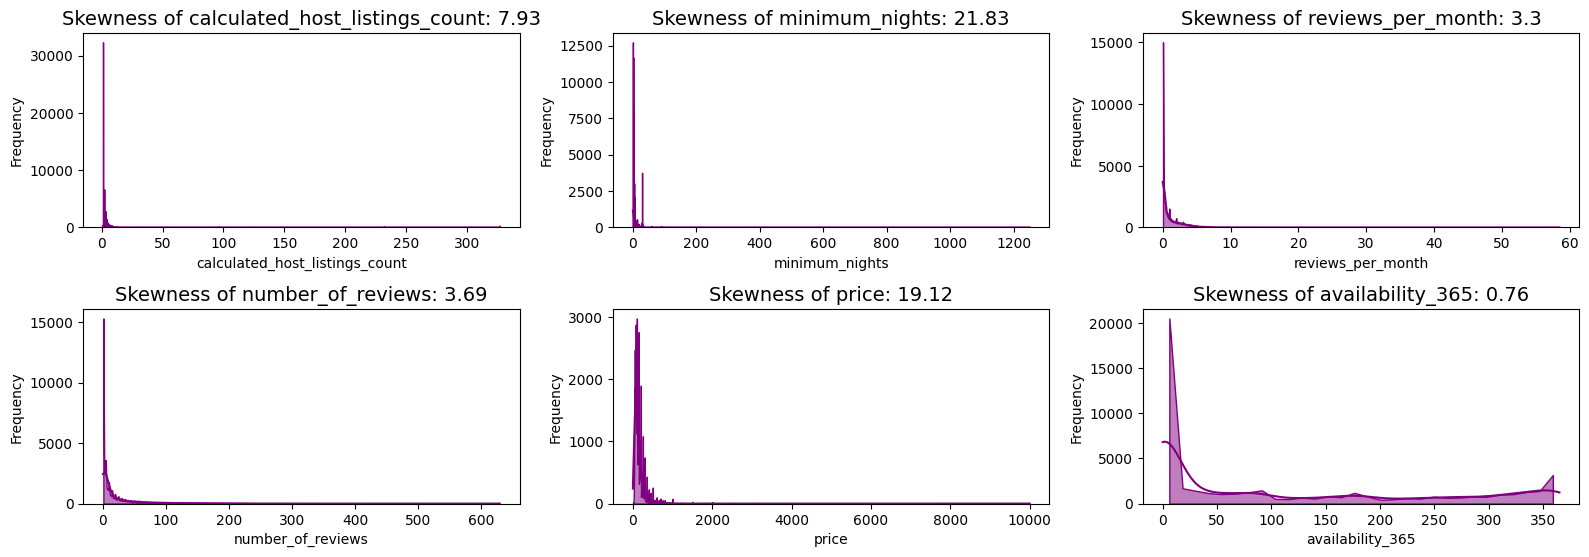

In [31]:
plt.figure(figsize=(16, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # Create subplots
    sns.histplot(df[column], kde=True, color='purple', element='poly')  # Distribution plot with kernel density estimate
    plt.title(f'Skewness of {column}: {df[column].skew().round(2)}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

> note:
>
> ***All the distributions are positively skewed***

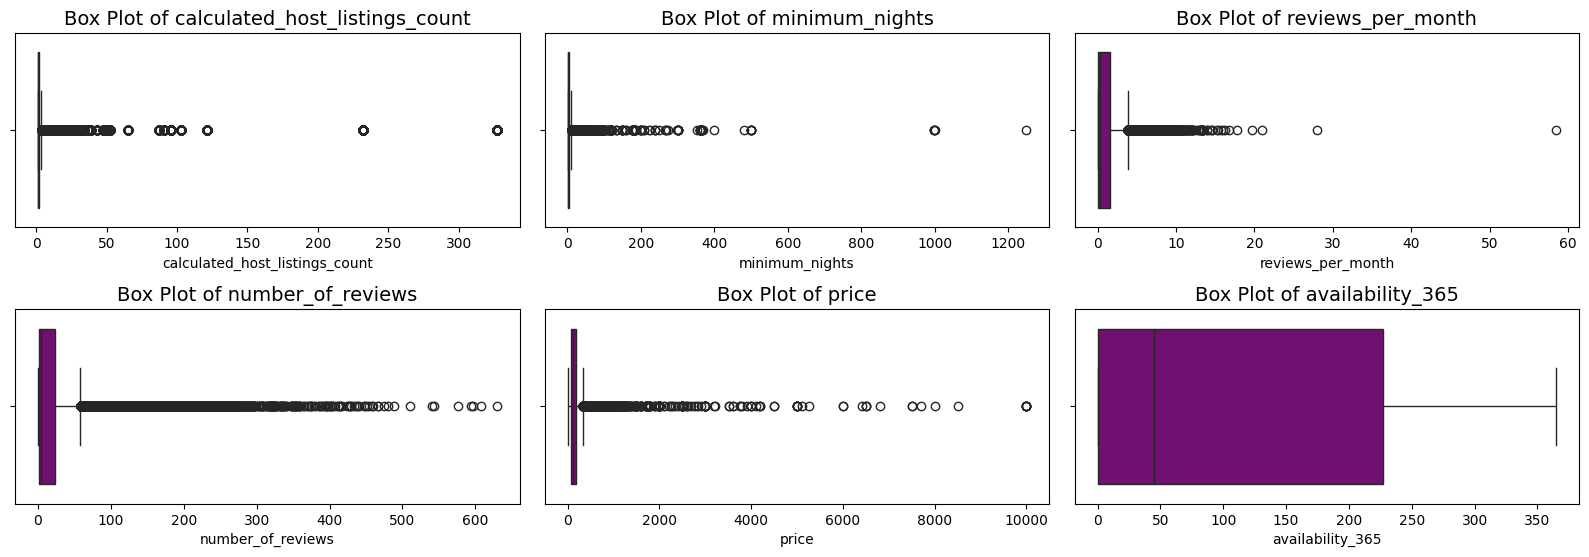

In [32]:
plt.figure(figsize=(16, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # Create subplots
    sns.boxplot(x=df[column], color='purple')  # Box plot
    plt.title(f'Box Plot of {column}', fontsize=14)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [33]:
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]


    print(f'Column: {column}')
    print(f'Q1: {Q1}')
    print(f'Q3: {Q3}')
    print(f'IQR: {IQR}')
    print(f'Lower Bound: {lower_bound}')
    print(f'Upper Bound: {upper_bound}')
    print(f'Number of Outliers: {len(outliers)}')
    print(f"---------------------------------------------------------------------------------------")

Column: calculated_host_listings_count
Q1: 1.0
Q3: 2.0
IQR: 1.0
Lower Bound: -0.5
Upper Bound: 3.5
Number of Outliers: 7081
---------------------------------------------------------------------------------------
Column: minimum_nights
Q1: 1.0
Q3: 5.0
IQR: 4.0
Lower Bound: -5.0
Upper Bound: 11.0
Number of Outliers: 6607
---------------------------------------------------------------------------------------
Column: reviews_per_month
Q1: 0.04
Q3: 1.58
IQR: 1.54
Lower Bound: -2.27
Upper Bound: 3.89
Number of Outliers: 3312
---------------------------------------------------------------------------------------
Column: number_of_reviews
Q1: 1.0
Q3: 24.0
IQR: 23.0
Lower Bound: -33.5
Upper Bound: 58.5
Number of Outliers: 6021
---------------------------------------------------------------------------------------
Column: price
Q1: 69.0
Q3: 175.0
IQR: 106.0
Lower Bound: -90.0
Upper Bound: 334.0
Number of Outliers: 2972
-----------------------------------------------------------------------------

In [34]:
# handling outliers in price: log transformation

df['log_price'] = np.log1p(df['price'])


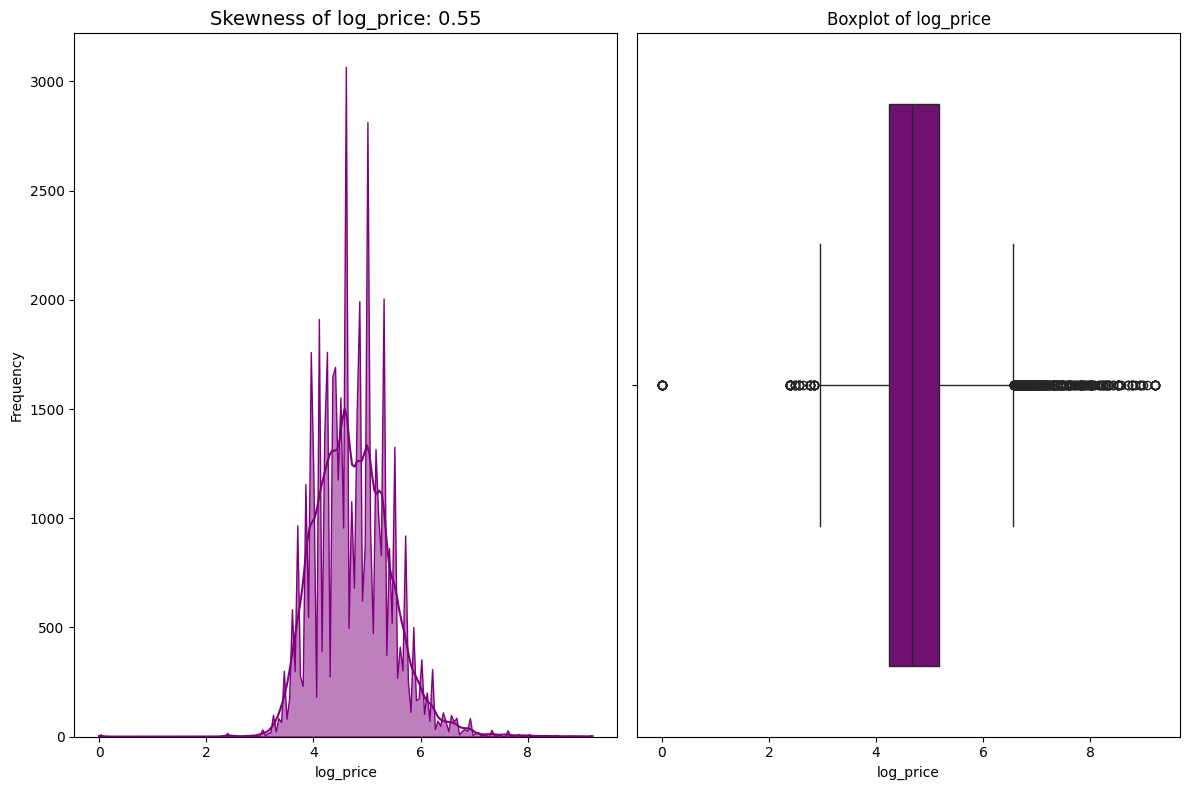

In [35]:
plt.figure(figsize=(12, 8))

log_price_skewness = df['log_price'].skew().round(2)

plt.subplot(1,2,1)
sns.histplot(df['log_price'], kde=True, color='purple', element='poly')  # Distribution plot with kernel density estimate
plt.title(f'Skewness of log_price: {log_price_skewness}', fontsize=14)
plt.xlabel('log_price')
plt.ylabel('Frequency')


plt.subplot(1,2,2)

sns.boxplot(x=df['log_price'], color='purple')
plt.title(f'Boxplot of log_price')

plt.tight_layout()
plt.show()

In [36]:
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['log_price'] < lower_bound) | (df['log_price'] > upper_bound)]

df1 = df[(df['log_price'] >= lower_bound) & (df['log_price'] <= upper_bound)]

print(f'Column: log_price')
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'Number of Outliers: {len(outliers)}')

Column: log_price
Q1: 4.248495242049359
Q3: 5.170483995038151
IQR: 0.921988752988792
Lower Bound: 2.8655121125661713
Upper Bound: 6.553467124521339
Number of Outliers: 637


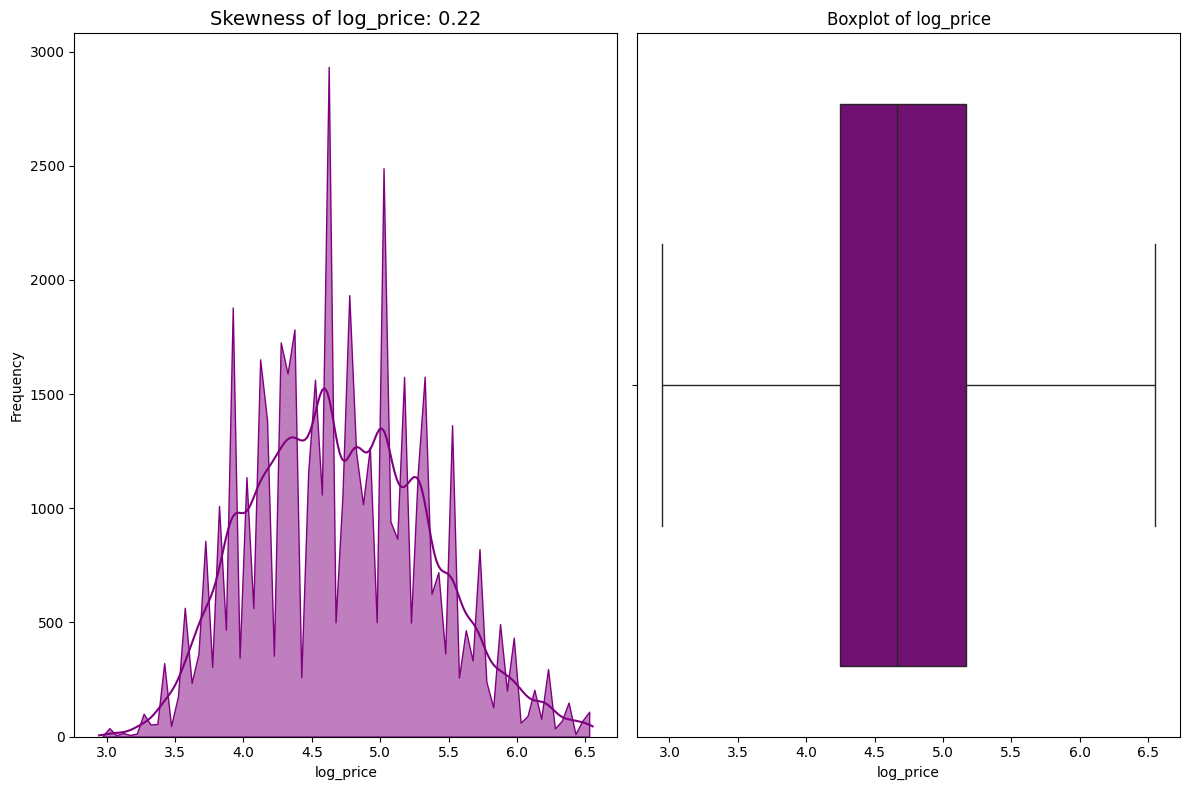

In [37]:
plt.figure(figsize=(12, 8))

log_price_skewness = df1['log_price'].skew().round(2)

plt.subplot(1,2,1)
sns.histplot(df1['log_price'], kde=True, color='purple', element='poly')  # Distribution plot with kernel density estimate
plt.title(f'Skewness of log_price: {log_price_skewness}', fontsize=14)
plt.xlabel('log_price')
plt.ylabel('Frequency')


plt.subplot(1,2,2)

sns.boxplot(x=df1['log_price'], color='purple')
plt.title(f'Boxplot of log_price')

plt.tight_layout()
plt.show()

## Analysis

In [38]:
avg_price_distribution = df1.groupby(['room_type'])['price'].mean().reset_index()
avg_price_distribution

,room_type,price
0,Entire home/apt,186.945234
1,Private room,82.995993
2,Shared room,64.028046


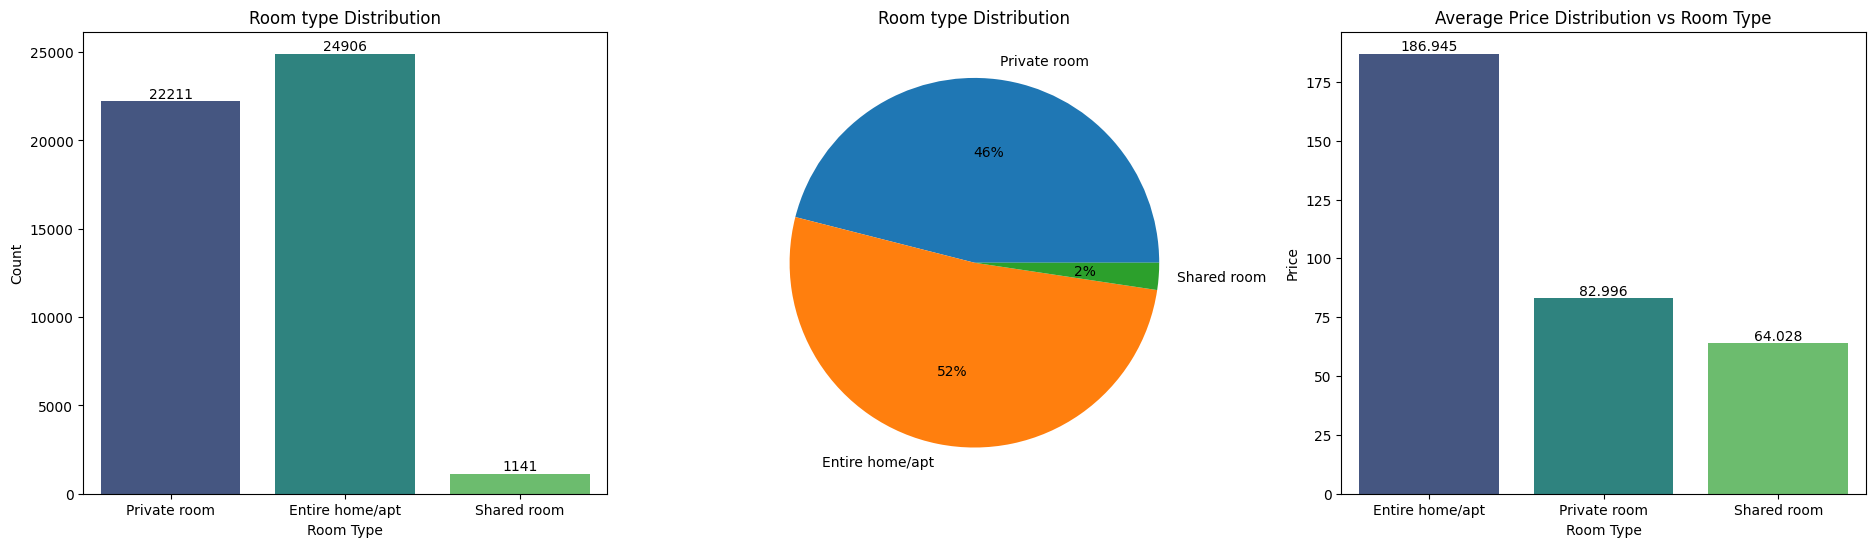

In [39]:
plt.figure(figsize=(23,6))

plt.subplot(1,3,1)
ax = sns.countplot(data=df1, x='room_type', hue='room_type', palette='viridis')
# Add text labels on top of the bars
for i in ax.containers:
    ax.bar_label(i)

# Add Title and labels to the axis
plt.title('Room type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')


data = pd.DataFrame(df1['room_type'].value_counts(sort=False)).reset_index()

plt.subplot(1,3,2)
plt.pie(data=data, labels='room_type', x='count', autopct='%.f%%')
plt.title('Room type Distribution')


plt.subplot(1,3,3)
ax = sns.barplot(data=avg_price_distribution, x='room_type', y='price', hue='room_type', palette='viridis')


# Add text labels on top of the bars
for i in ax.containers:
    ax.bar_label(i)

plt.title('Average Price Distribution vs Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

plt.show()

In [40]:


neighbourhood_group_count = pd.DataFrame(df1['neighbourhood_group'].value_counts(sort=False)).reset_index()
# neighbourhood_group_count

neighbourhood_count = pd.DataFrame(df1['neighbourhood'].value_counts(sort=False)).reset_index()
# neighbourhood_count

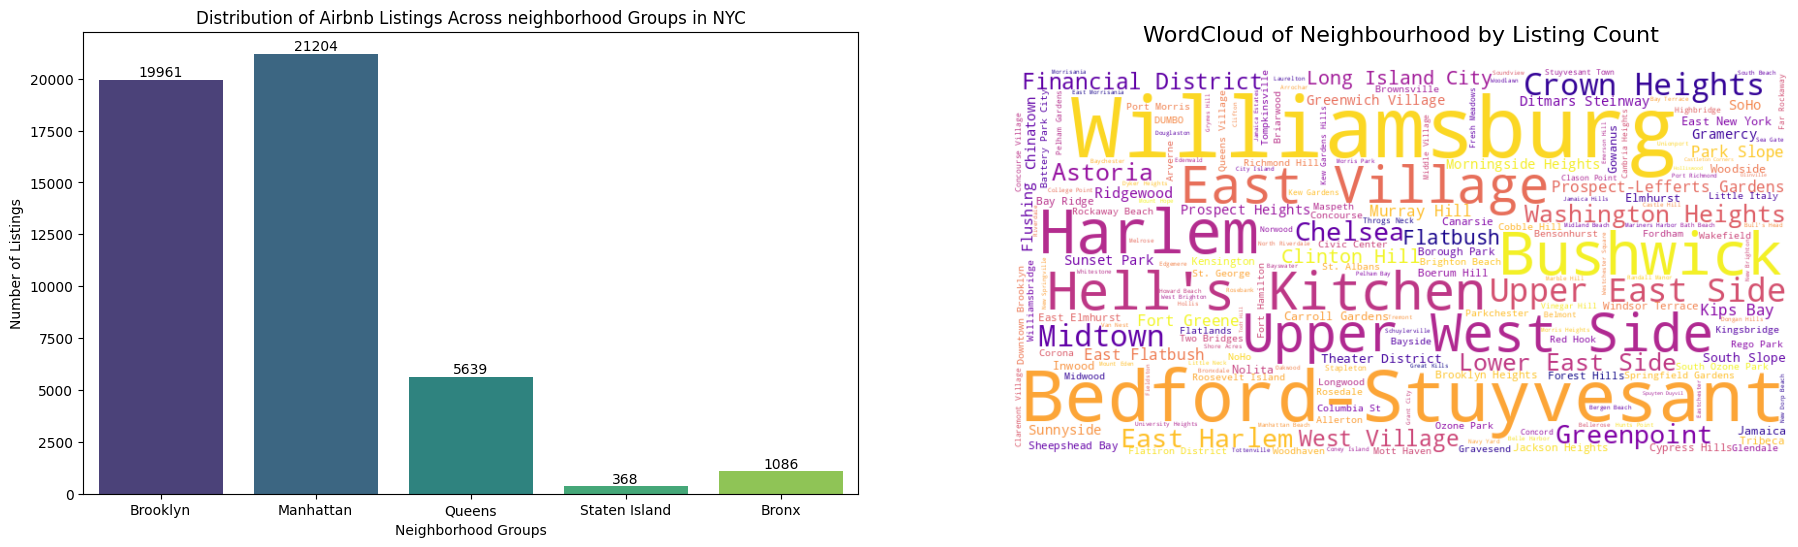

In [41]:
# chart - 2 : distribution of airbnb listings across neighborhoods in NYC

plt.figure(figsize=(22,6))

x = 'neighbourhood_group'
y = 'count'
data = neighbourhood_group_count

plt.subplot(1, 2, 1)

# Bar plot
ax = sns.barplot(x = x, y = y, data=data, hue = x, palette='viridis')


# Add text labels on top of the bars
for i in ax.containers:
    ax.bar_label(i)

# Add Title and labels to the axis
plt.title('Distribution of Airbnb Listings Across neighborhood Groups in NYC')
plt.xlabel('Neighborhood Groups')
plt.ylabel('Number of Listings')



# Create a dictionary for neighbourhood_group and their counts
wordcloud_dict = dict(zip(neighbourhood_count['neighbourhood'], neighbourhood_count['count']))

# Generate the word cloud using the frequency of each neighbourhood_group
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate_from_frequencies(wordcloud_dict)

# Plot the WordCloud
plt.subplot(1,2,2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Neighbourhood by Listing Count', fontsize=16, pad=20)



plt.show()

In [42]:
room_type_distribution = pd.DataFrame(df1[['neighbourhood_group', 'room_type']].value_counts(sort=False)).reset_index()
# room_type_distribution

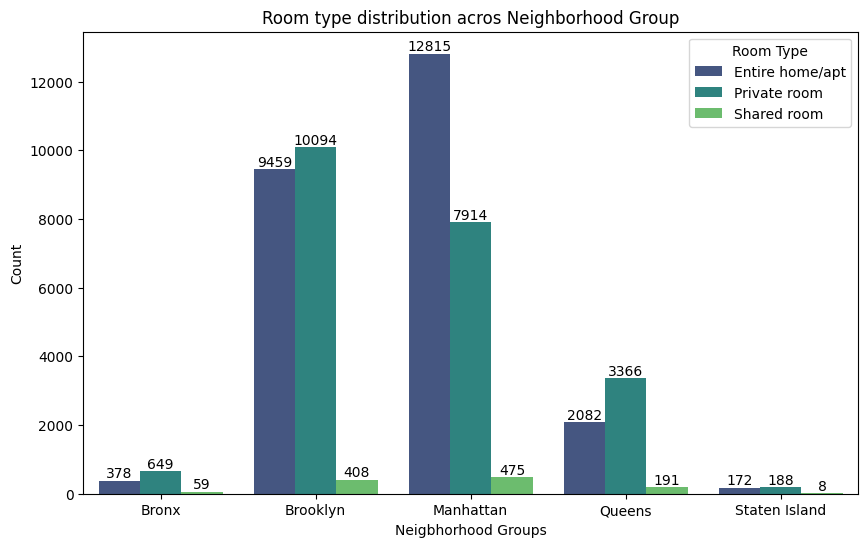

In [43]:
# chart - 3 : Average price by room type and neighborhood group

plt.figure(figsize=(10, 6))

x='neighbourhood_group'
y='count'

data = room_type_distribution

ax = sns.barplot(x = x, y = y, data = data, hue = 'room_type',  palette='viridis')

for i in ax.containers:
    ax.bar_label(i, fmt='%.f')

plt.title('Room type distribution acros Neighborhood Group')
plt.xlabel('Neigbhorhood Groups')
plt.ylabel('Count')

plt.legend(title='Room Type')

plt.show()

In [44]:
avg_price = df1.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
# avg_price

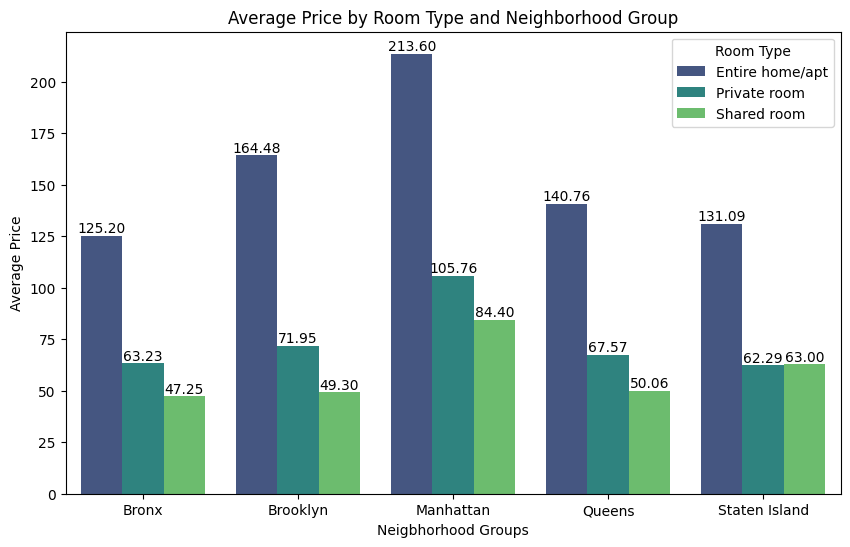

In [45]:
# chart - 3 : Average price by room type and neighborhood group

plt.figure(figsize=(10, 6))

x='neighbourhood_group'
y='price'

data = avg_price

ax = sns.barplot(x = x, y = y, data = data, hue = 'room_type',  palette='viridis')

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')

plt.title('Average Price by Room Type and Neighborhood Group')
plt.xlabel('Neigbhorhood Groups')
plt.ylabel('Average Price')

plt.legend(title='Room Type')

plt.show()

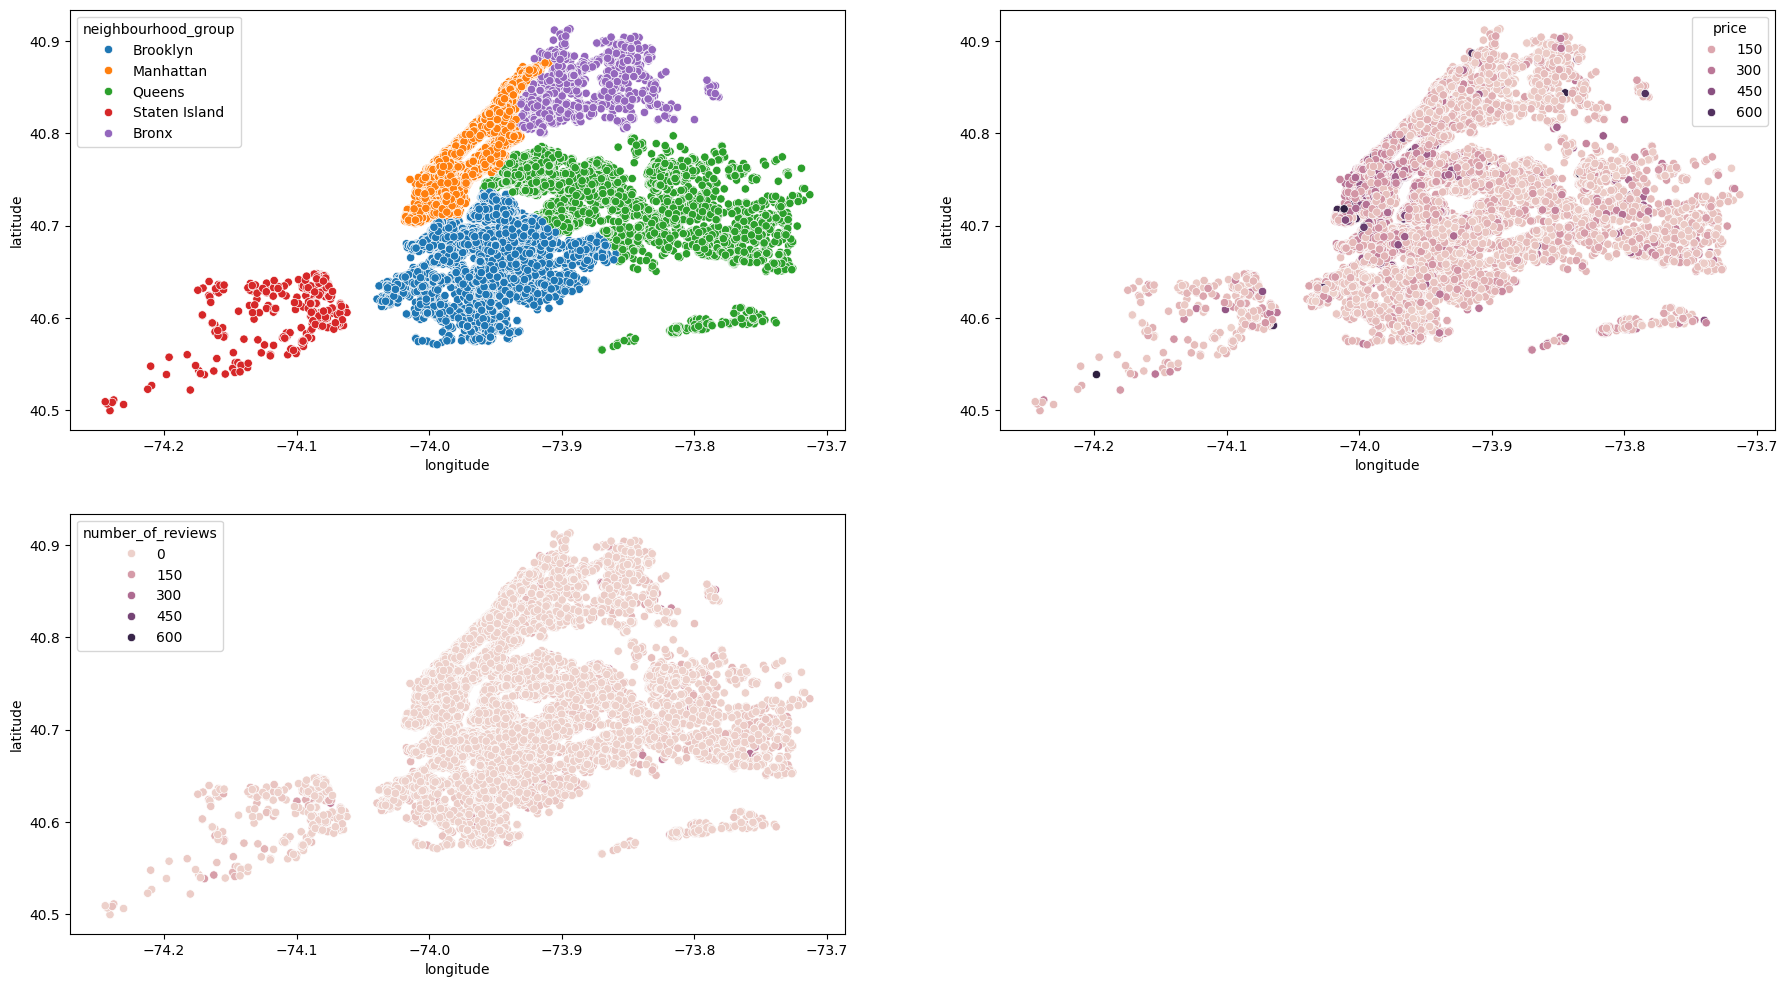

In [46]:
plt.figure(figsize=(22, 12))
plt.subplot(2,2,1)
sns.scatterplot(data=df1, y='latitude', x='longitude', hue='neighbourhood_group')

plt.subplot(2,2,2)
sns.scatterplot(data=df1, y='latitude', x='longitude', hue='price')

plt.subplot(2,2,3)

sns.scatterplot(data=df1, y='latitude', x='longitude', hue='number_of_reviews', sizes=(20, 160))
# plt.legend().remove()
plt.show()